In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("/kaggle/input/mlpr-merged-data/storm_and_outage_merged.csv")

In [2]:
prism = pd.read_csv("/kaggle/input/prism-us-dataset-2014-23/prism_us_data.csv")

In [3]:
prism

,st_abb,st_code,date,stability,tmin,tmax,tavg,ppt
0,AL,1,20140101,stable,1.120,7.147,4.133,0.613
1,AL,1,20140102,stable,1.991,10.963,6.477,5.808
2,AL,1,20140103,stable,-5.715,11.507,2.896,3.426
3,AL,1,20140104,stable,-6.232,2.895,-1.669,0.005
4,AL,1,20140105,stable,-3.563,9.385,2.911,0.001
...,...,...,...,...,...,...,...,...
175291,WY,56,20231227,stable,-10.787,-0.377,-5.582,0.266
175292,WY,56,20231228,stable,-10.978,1.837,-4.570,0.002
175293,WY,56,20231229,stable,-10.555,3.532,-3.511,0.001
175294,WY,56,20231230,stable,-8.899,5.913,-1.493,0.005


In [4]:
df

,Unnamed: 0,customers_out,power_outage_datetime,storm_start_datetime_est,storm_end_datetime_est,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,...,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,EPISODE_NARRATIVE,EVENT_NARRATIVE,MAGNITUDE_IMPUTED,MAGNITUDE_TYPE_IMPUTED
0,0,4.0,2014-11-23 12:15:00,2014-11-23 12:05:00,2014-11-23 12:25:00,0.333333,ALABAMA,1.0,Thunderstorm Wind,C,...,0.0,0.0,0.0,3000.0,0.0,Emergency Manager,A strong upper level trough and surface cold f...,Numerous trees were blown down across the county.,55.00000,EG
1,1,65.0,2014-12-23 15:45:00,2014-12-23 15:44:00,2014-12-23 15:45:00,0.016667,ALABAMA,1.0,Thunderstorm Wind,C,...,0.0,0.0,0.0,0.0,0.0,Amateur Radio,A deep upper level trough over the Plains Stat...,Several large tree limbs broken.,50.00000,EG
2,2,53.0,2014-12-23 17:00:00,2014-12-23 17:00:00,2014-12-23 19:30:00,2.500000,ALABAMA,1.0,Flash Flood,C,...,0.0,0.0,0.0,0.0,0.0,Emergency Manager,A deep upper level trough over the Plains Stat...,Ten to fifteen roads in the town of Vernon wer...,0.92894,MS
3,3,47.0,2014-12-23 17:15:00,2014-12-23 17:00:00,2014-12-23 19:30:00,2.500000,ALABAMA,1.0,Flash Flood,C,...,0.0,0.0,0.0,0.0,0.0,Emergency Manager,A deep upper level trough over the Plains Stat...,Ten to fifteen roads in the town of Vernon wer...,0.92894,MS
4,4,33.0,2014-12-23 19:30:00,2014-12-23 19:30:00,2014-12-23 19:31:00,0.016667,ALABAMA,1.0,Thunderstorm Wind,C,...,0.0,0.0,0.0,1000.0,0.0,Public,Strong to isolated severe thunderstorms develo...,Strong wind gusts near 50 mph uprooted a magno...,45.00000,EG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407006,407006,5807.0,2023-12-22 23:30:00,2023-12-22 23:20:00,2023-12-22 23:45:00,0.416667,PUERTO RICO,99.0,Flash Flood,C,...,0.0,0.0,0.0,1100.0,0.0,Emergency Manager,"A wet pattern peaked Friday, December 22nd, an...",Emergency Management reported 4 people trapped...,0.32800,EG
407007,407007,2707.0,2023-12-22 23:45:00,2023-12-22 23:20:00,2023-12-22 23:45:00,0.416667,PUERTO RICO,99.0,Flash Flood,C,...,0.0,0.0,0.0,1100.0,0.0,Emergency Manager,"A wet pattern peaked Friday, December 22nd, an...",Emergency Management reported 4 people trapped...,0.32800,EG
407008,407008,706.0,2023-12-23 01:30:00,2023-12-23 01:30:00,2023-12-23 02:00:00,0.500000,PUERTO RICO,99.0,Flood,C,...,0.0,0.0,0.0,400.0,0.0,911 Call Center,"A wet pattern peaked Friday, December 22nd, an...","A 911 employee reported a flooded road, parti...",0.25750,EG
407009,407009,757.0,2023-12-23 01:45:00,2023-12-23 01:30:00,2023-12-23 02:00:00,0.500000,PUERTO RICO,99.0,Flood,C,...,0.0,0.0,0.0,400.0,0.0,911 Call Center,"A wet pattern peaked Friday, December 22nd, an...","A 911 employee reported a flooded road, parti...",0.25750,EG


In [ ]:
"""
Task:
Merge PRISM weather data with the storm dataset to incorporate additional relevant features for analysis.

Approach:
Extract the date from `power_outage_datetime` in the storm dataset and convert PRISM's date column to a compatible format. Merge the datasets on state codes (`STATE_FIPS` and `st_code`) and date, using a left join to retain all storm records.


"""
df['date'] = pd.to_datetime(df['power_outage_datetime']).dt.date

# Convert the 'date' column in prism to a date format (ignoring time)
prism['date'] = pd.to_datetime(prism['date'].astype(str), format='%Y%m%d').dt.date

# Merge df and prism on the state codes and date
# 'STATE_FIPS' from df matches with 'st_code' from prism
prism_noaa = pd.merge(df, prism, left_on=['STATE_FIPS', 'date'], right_on=['st_code', 'date'], how='left')

# Verify the result by displaying the first few rows
prism_noaa

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,customers_out,power_outage_datetime,storm_start_datetime_est,storm_end_datetime_est,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,...,MAGNITUDE_IMPUTED,MAGNITUDE_TYPE_IMPUTED,date,st_abb,st_code,stability,tmin,tmax,tavg,ppt
0,0,4.0,2014-11-23 12:15:00,2014-11-23 12:05:00,2014-11-23 12:25:00,0.333333,ALABAMA,1.0,Thunderstorm Wind,C,...,55.00000,EG,2014-11-23,AL,1.0,stable,6.155,19.191,12.673,3.333
1,1,65.0,2014-12-23 15:45:00,2014-12-23 15:44:00,2014-12-23 15:45:00,0.016667,ALABAMA,1.0,Thunderstorm Wind,C,...,50.00000,EG,2014-12-23,AL,1.0,stable,9.554,13.836,11.695,7.036
2,2,53.0,2014-12-23 17:00:00,2014-12-23 17:00:00,2014-12-23 19:30:00,2.500000,ALABAMA,1.0,Flash Flood,C,...,0.92894,MS,2014-12-23,AL,1.0,stable,9.554,13.836,11.695,7.036
3,3,47.0,2014-12-23 17:15:00,2014-12-23 17:00:00,2014-12-23 19:30:00,2.500000,ALABAMA,1.0,Flash Flood,C,...,0.92894,MS,2014-12-23,AL,1.0,stable,9.554,13.836,11.695,7.036
4,4,33.0,2014-12-23 19:30:00,2014-12-23 19:30:00,2014-12-23 19:31:00,0.016667,ALABAMA,1.0,Thunderstorm Wind,C,...,45.00000,EG,2014-12-23,AL,1.0,stable,9.554,13.836,11.695,7.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407006,407006,5807.0,2023-12-22 23:30:00,2023-12-22 23:20:00,2023-12-22 23:45:00,0.416667,PUERTO RICO,99.0,Flash Flood,C,...,0.32800,EG,2023-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407007,407007,2707.0,2023-12-22 23:45:00,2023-12-22 23:20:00,2023-12-22 23:45:00,0.416667,PUERTO RICO,99.0,Flash Flood,C,...,0.32800,EG,2023-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407008,407008,706.0,2023-12-23 01:30:00,2023-12-23 01:30:00,2023-12-23 02:00:00,0.500000,PUERTO RICO,99.0,Flood,C,...,0.25750,EG,2023-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407009,407009,757.0,2023-12-23 01:45:00,2023-12-23 01:30:00,2023-12-23 02:00:00,0.500000,PUERTO RICO,99.0,Flood,C,...,0.25750,EG,2023-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


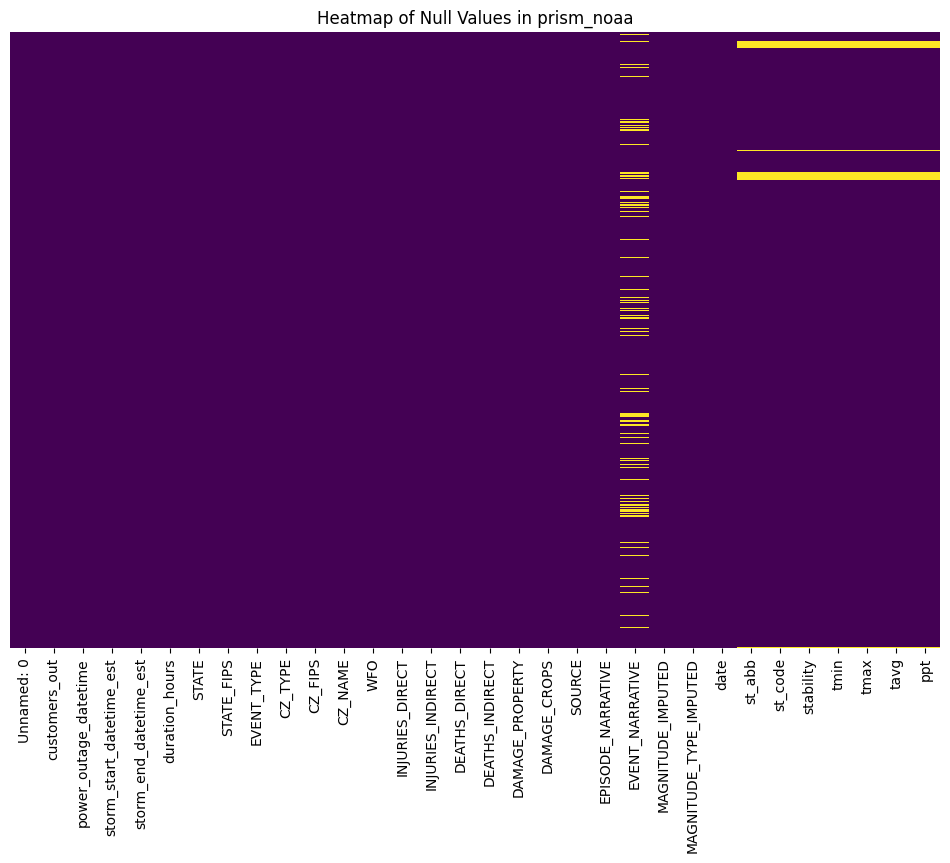

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to visualize null values in the DataFrame
plt.figure(figsize=(12, 8))
sns.heatmap(prism_noaa.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Heatmap of Null Values in prism_noaa")
plt.show()

In [7]:
prism_noaa = prism_noaa.dropna(subset=['ppt'])

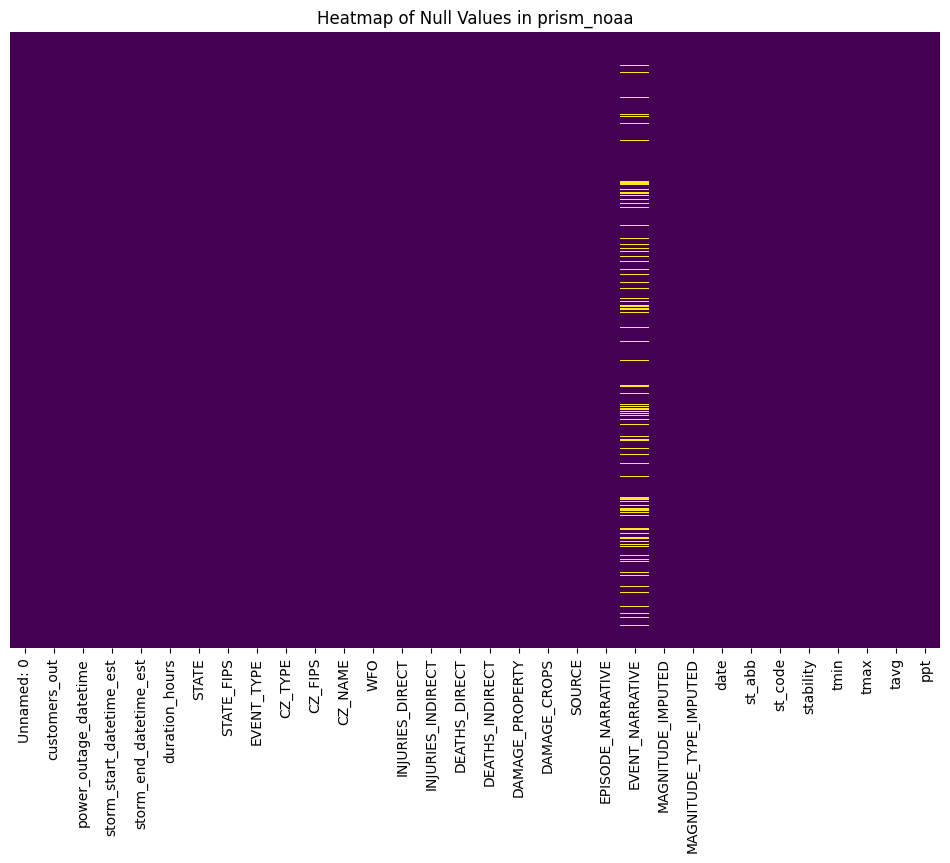

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(prism_noaa.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Heatmap of Null Values in prism_noaa")
plt.show()

In [9]:
df = prism_noaa

In [ ]:
# df = df[df['EVENT_NARRATIVE'].notnull()]
"""
Task:
Create a combined `description` column by concatenating `EVENT_NARRATIVE` and `EPISODE_NARRATIVE` from the storm dataset. (so that we dont have missing values when using NLP)

Approach:
Fill missing values in `EVENT_NARRATIVE` and `EPISODE_NARRATIVE` with empty strings and concatenate them with a space separator to form a new `description` column.


"""
df['description'] = df['EVENT_NARRATIVE'].fillna('') + ' ' + df['EPISODE_NARRATIVE'].fillna('')

/tmp/ipykernel_225/2737538787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['EVENT_NARRATIVE'].fillna('') + ' ' + df['EPISODE_NARRATIVE'].fillna('')


In [11]:
# df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['Unnamed: 0','EVENT_NARRATIVE','EPISODE_NARRATIVE'])

In [12]:
df.isnull().sum()

customers_out               0
power_outage_datetime       0
storm_start_datetime_est    0
storm_end_datetime_est      0
duration_hours              0
STATE                       0
STATE_FIPS                  0
EVENT_TYPE                  0
CZ_TYPE                     0
CZ_FIPS                     0
CZ_NAME                     0
WFO                         0
INJURIES_DIRECT             0
INJURIES_INDIRECT           0
DEATHS_DIRECT               0
DEATHS_INDIRECT             0
DAMAGE_PROPERTY             0
DAMAGE_CROPS                0
SOURCE                      0
MAGNITUDE_IMPUTED           0
MAGNITUDE_TYPE_IMPUTED      0
date                        0
st_abb                      0
st_code                     0
stability                   0
tmin                        0
tmax                        0
tavg                        0
ppt                         0
description                 0
dtype: int64

In [13]:
df

,customers_out,power_outage_datetime,storm_start_datetime_est,storm_end_datetime_est,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,CZ_FIPS,...,MAGNITUDE_TYPE_IMPUTED,date,st_abb,st_code,stability,tmin,tmax,tavg,ppt,description
0,4.0,2014-11-23 12:15:00,2014-11-23 12:05:00,2014-11-23 12:25:00,0.333333,ALABAMA,1.0,Thunderstorm Wind,C,45.0,...,EG,2014-11-23,AL,1.0,stable,6.155,19.191,12.673,3.333,Numerous trees were blown down across the coun...
1,65.0,2014-12-23 15:45:00,2014-12-23 15:44:00,2014-12-23 15:45:00,0.016667,ALABAMA,1.0,Thunderstorm Wind,C,119.0,...,EG,2014-12-23,AL,1.0,stable,9.554,13.836,11.695,7.036,Several large tree limbs broken. A deep upper ...
2,53.0,2014-12-23 17:00:00,2014-12-23 17:00:00,2014-12-23 19:30:00,2.500000,ALABAMA,1.0,Flash Flood,C,75.0,...,MS,2014-12-23,AL,1.0,stable,9.554,13.836,11.695,7.036,Ten to fifteen roads in the town of Vernon wer...
3,47.0,2014-12-23 17:15:00,2014-12-23 17:00:00,2014-12-23 19:30:00,2.500000,ALABAMA,1.0,Flash Flood,C,75.0,...,MS,2014-12-23,AL,1.0,stable,9.554,13.836,11.695,7.036,Ten to fifteen roads in the town of Vernon wer...
4,33.0,2014-12-23 19:30:00,2014-12-23 19:30:00,2014-12-23 19:31:00,0.016667,ALABAMA,1.0,Thunderstorm Wind,C,3.0,...,EG,2014-12-23,AL,1.0,stable,9.554,13.836,11.695,7.036,Strong wind gusts near 50 mph uprooted a magno...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405923,3.0,2023-12-26 01:15:00,2023-12-26 00:26:00,2023-12-26 11:30:00,11.066667,WYOMING,56.0,Blizzard,Z,116.0,...,MS,2023-12-26,WY,56.0,stable,-15.951,-4.296,-10.124,0.650,WYDOT mesonet stations Summit East (WY28) loca...
405924,3498.0,2023-12-26 03:45:00,2023-12-26 03:44:00,2023-12-26 08:26:00,4.700000,WYOMING,56.0,High Wind,Z,107.0,...,MG,2023-12-26,WY,56.0,stable,-15.951,-4.296,-10.124,0.650,WYDOT mesonet station Coleman (WY1) along Inte...
405925,3498.0,2023-12-26 04:00:00,2023-12-26 03:44:00,2023-12-26 08:26:00,4.700000,WYOMING,56.0,High Wind,Z,107.0,...,MG,2023-12-26,WY,56.0,stable,-15.951,-4.296,-10.124,0.650,WYDOT mesonet station Coleman (WY1) along Inte...
405926,1513.0,2023-12-26 04:15:00,2023-12-26 03:44:00,2023-12-26 08:26:00,4.700000,WYOMING,56.0,High Wind,Z,107.0,...,MG,2023-12-26,WY,56.0,stable,-15.951,-4.296,-10.124,0.650,WYDOT mesonet station Coleman (WY1) along Inte...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395267 entries, 0 to 405927
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customers_out             395267 non-null  float64
 1   power_outage_datetime     395267 non-null  object 
 2   storm_start_datetime_est  395267 non-null  object 
 3   storm_end_datetime_est    395267 non-null  object 
 4   duration_hours            395267 non-null  float64
 5   STATE                     395267 non-null  object 
 6   STATE_FIPS                395267 non-null  float64
 7   EVENT_TYPE                395267 non-null  object 
 8   CZ_TYPE                   395267 non-null  object 
 9   CZ_FIPS                   395267 non-null  float64
 10  CZ_NAME                   395267 non-null  object 
 11  WFO                       395267 non-null  object 
 12  INJURIES_DIRECT           395267 non-null  float64
 13  INJURIES_INDIRECT         395267 non-null  float6

In [ ]:
# Create a new column 'is_storm' based on MAGNITUDE_IMPUTED values
"""
Task:
Classify events as storms based on `MAGNITUDE_IMPUTED` and summarize the distribution of storm vs. non-storm events.

Approach:
Create an `is_storm` column, assigning 1 to events with `MAGNITUDE_IMPUTED` >= 25 and 0 otherwise. Calculate counts and percentages of each category and present them in a summary DataFrame.

"""

df['is_storm'] = 0
df.loc[df['MAGNITUDE_IMPUTED'] >= 25, 'is_storm'] = 1

# Display counts and percentages of each category
storm_counts = df['is_storm'].value_counts()
storm_percentages = df['is_storm'].value_counts(normalize=True) * 100

# Create a summary dataframe
summary_df = pd.DataFrame({
    'Count': storm_counts,
    'Percentage': storm_percentages.round(2)
})

print("Storm classification summary:")
print(summary_df)

Storm classification summary:
           Count  Percentage
is_storm                    
0         205239       51.92
1         190028       48.08


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
"""
Task:
Prepare storm data for severity classification by filtering storm events and creating encoded severity classes.

Approach:
Filter the dataset for storm events (`is_storm` == 1). Create a `severity_class` column based on `MAGNITUDE_IMPUTED` quantiles (Low, Moderate, High). We also Encode the severity classes numerically using `LabelEncoder`.


"""
# Filter rows where is_storm is 1 and make a copy
storm_df = df[df['is_storm'] == 1].copy()

# Create severity_class if not already present
if 'severity_class' not in storm_df.columns:
    low_thres = storm_df['MAGNITUDE_IMPUTED'].quantile(0.33)
    high_thres = storm_df['MAGNITUDE_IMPUTED'].quantile(0.66)

    def classify(score):
        if score <= low_thres:
            return 0  # Low
        elif score <= high_thres:
            return 1  # Moderate
        else:
            return 2  # High

    storm_df['severity_class'] = storm_df['MAGNITUDE_IMPUTED'].apply(classify)

# Encode labels
label_encoder = LabelEncoder()
storm_df['severity_encoded'] = label_encoder.fit_transform(storm_df['severity_class'])

In [17]:
storm_df

,customers_out,power_outage_datetime,storm_start_datetime_est,storm_end_datetime_est,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,CZ_FIPS,...,st_code,stability,tmin,tmax,tavg,ppt,description,is_storm,severity_class,severity_encoded
0,4.0,2014-11-23 12:15:00,2014-11-23 12:05:00,2014-11-23 12:25:00,0.333333,ALABAMA,1.0,Thunderstorm Wind,C,45.0,...,1.0,stable,6.155,19.191,12.673,3.333,Numerous trees were blown down across the coun...,1,2,2
1,65.0,2014-12-23 15:45:00,2014-12-23 15:44:00,2014-12-23 15:45:00,0.016667,ALABAMA,1.0,Thunderstorm Wind,C,119.0,...,1.0,stable,9.554,13.836,11.695,7.036,Several large tree limbs broken. A deep upper ...,1,1,1
4,33.0,2014-12-23 19:30:00,2014-12-23 19:30:00,2014-12-23 19:31:00,0.016667,ALABAMA,1.0,Thunderstorm Wind,C,3.0,...,1.0,stable,9.554,13.836,11.695,7.036,Strong wind gusts near 50 mph uprooted a magno...,1,0,0
14,3.0,2015-01-03 15:30:00,2015-01-03 15:30:00,2015-01-03 15:30:00,0.000000,ALABAMA,1.0,Thunderstorm Wind,C,99.0,...,1.0,stable,7.562,13.720,10.641,10.255,A severe thunderstorm wind gust blew down a po...,1,1,1
20,28.0,2015-01-04 02:15:00,2015-01-04 02:11:00,2015-01-04 02:35:00,0.400000,ALABAMA,1.0,Tornado,C,41.0,...,1.0,stable,12.089,19.797,15.943,47.009,A severe thunderstorm moved northeastward acro...,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405919,2.0,2023-12-25 23:00:00,2023-12-25 22:10:00,2023-12-26 17:53:00,19.716667,WYOMING,56.0,High Wind,Z,118.0,...,56.0,stable,-15.952,-4.120,-10.036,0.042,Cheyenne Airport ASOS station (KCYS) measured ...,1,1,1
405924,3498.0,2023-12-26 03:45:00,2023-12-26 03:44:00,2023-12-26 08:26:00,4.700000,WYOMING,56.0,High Wind,Z,107.0,...,56.0,stable,-15.951,-4.296,-10.124,0.650,WYDOT mesonet station Coleman (WY1) along Inte...,1,2,2
405925,3498.0,2023-12-26 04:00:00,2023-12-26 03:44:00,2023-12-26 08:26:00,4.700000,WYOMING,56.0,High Wind,Z,107.0,...,56.0,stable,-15.951,-4.296,-10.124,0.650,WYDOT mesonet station Coleman (WY1) along Inte...,1,2,2
405926,1513.0,2023-12-26 04:15:00,2023-12-26 03:44:00,2023-12-26 08:26:00,4.700000,WYOMING,56.0,High Wind,Z,107.0,...,56.0,stable,-15.951,-4.296,-10.124,0.650,WYDOT mesonet station Coleman (WY1) along Inte...,1,2,2


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    """
Task:
Clean and preprocess text data for natural language processing.

Approach:
Convert input text to lowercase, remove non-alphabetic characters, tokenize, remove English stopwords, lemmatize words, and join tokens into a single string.
"""

    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

storm_df['desc_clean'] = storm_df['description'].astype(str).apply(preprocess)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
storm_df['desc_word_count'] = storm_df['desc_clean'].apply(lambda x: len(x.split()))
storm_df['desc_char_count'] = storm_df['desc_clean'].apply(len)

In [20]:
keywords = ['tornado', 'hail', 'flood', 'wind', 'tree', 'power', 'damage', 'outage', 'broken', 'blown']

for word in keywords:
    storm_df[f'has_{word}'] = storm_df['desc_clean'].apply(lambda x: 1 if word in x else 0)

In [21]:
storm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190028 entries, 0 to 405927
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customers_out             190028 non-null  float64
 1   power_outage_datetime     190028 non-null  object 
 2   storm_start_datetime_est  190028 non-null  object 
 3   storm_end_datetime_est    190028 non-null  object 
 4   duration_hours            190028 non-null  float64
 5   STATE                     190028 non-null  object 
 6   STATE_FIPS                190028 non-null  float64
 7   EVENT_TYPE                190028 non-null  object 
 8   CZ_TYPE                   190028 non-null  object 
 9   CZ_FIPS                   190028 non-null  float64
 10  CZ_NAME                   190028 non-null  object 
 11  WFO                       190028 non-null  object 
 12  INJURIES_DIRECT           190028 non-null  float64
 13  INJURIES_INDIRECT         190028 non-null  float6

In [ ]:
"""
Task:
Prepare data for storm severity classification by selecting a comprehensive set of features and splitting into train/test sets.

Approach:
Define a feature set including original impact metrics, NLP-derived features from text preprocessing, and PRISM weather features. Extract features and target (`severity_encoded`), scale using `StandardScaler`, and split data into training and testing sets with stratification.


"""
features = [
    # Original impact features
    'DEATHS_INDIRECT', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
    'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'customers_out', 'duration_hours',

    # NLP-derived features
    'desc_word_count', 'desc_char_count',
    'has_tornado', 'has_hail', 'has_flood', 'has_wind', 'has_tree',
    'has_power', 'has_damage', 'has_outage', 'has_broken', 'has_blown',

    #prism features
    'tmin', 'tmax', 'tavg', 'ppt'
]

X = storm_df[features]
y = storm_df['severity_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [23]:
output_file = '/kaggle/working/noaa+powout+prism.csv'
storm_df.to_csv(output_file)

In [24]:
output_file = '/kaggle/working/X.csv'
X.to_csv(output_file)

In [25]:
output_file = '/kaggle/working/y.csv'
y.to_csv(output_file)

# Model Training

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

Random Forest Results:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     12543
           1       0.88      0.92      0.90     12553
           2       0.92      0.90      0.91     12910

    accuracy                           0.92     38006
   macro avg       0.92      0.92      0.92     38006
weighted avg       0.92      0.92      0.92     38006

Confusion Matrix:
[[11936   415   192]
 [  184 11543   826]
 [  124  1154 11632]]


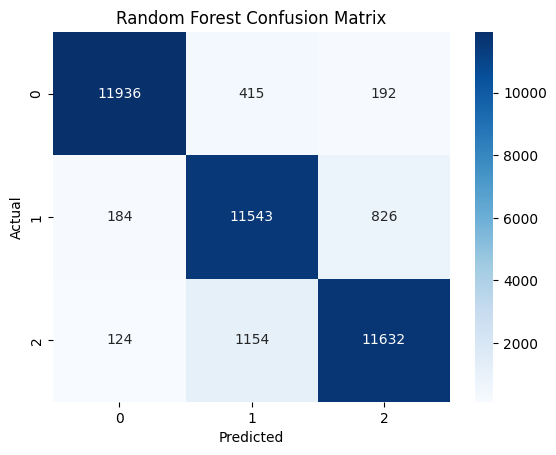

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
"""
Task:
Evaluate the performance of the Random Forest model, our best model from the last attempt, and visualize its results.

Approach:
Print the classification report to show precision, recall, and F1-score for the test set predictions. Compute and display the confusion matrix, then visualize it as a heatmap. We trusted this model based on its previous performance and re-ran it here, confirming good results.

"""
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
def plot_conf_matrix(y_true, y_pred, title):
    """
    Plot a confusion matrix using a heatmap to visualize classification model performance.

    Parameters:
    y_true : array-like
        True labels of the data.
    y_pred : array-like
        Predicted labels from the model.
    title : str
        Title for the confusion matrix plot.

    Returns:
    None
        Displays a heatmap of the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [ ]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
plot_conf_matrix(y_test, y_pred_svm, "SVM")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.58      0.50     12543
           1       0.48      0.32      0.38     12553
           2       0.45      0.45      0.45     12910

    accuracy                           0.45     38006
   macro avg       0.45      0.45      0.44     38006
weighted avg       0.45      0.45      0.44     38006



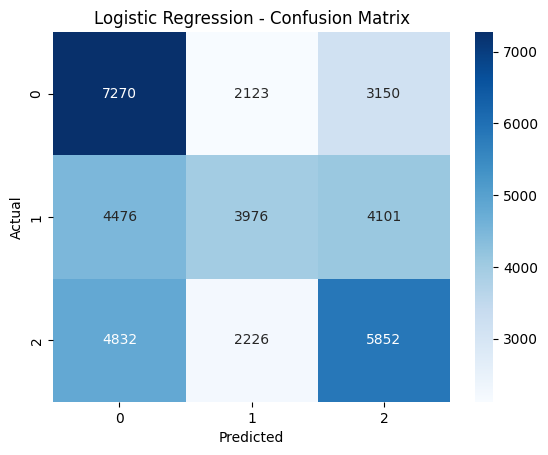

In [31]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
plot_conf_matrix(y_test, y_pred_logreg, "Logistic Regression")


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72     12543
           1       0.70      0.59      0.64     12553
           2       0.65      0.70      0.67     12910

    accuracy                           0.68     38006
   macro avg       0.68      0.68      0.68     38006
weighted avg       0.68      0.68      0.68     38006



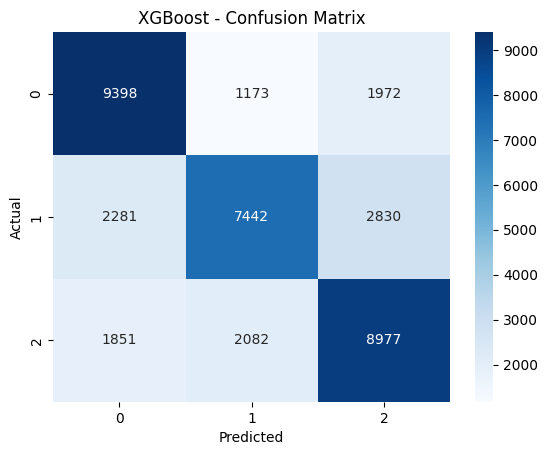

In [32]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
plot_conf_matrix(y_test, y_pred_xgb, "XGBoost")


Neural Net Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.63      0.58     12543
           1       0.56      0.39      0.46     12553
           2       0.52      0.60      0.56     12910

    accuracy                           0.54     38006
   macro avg       0.54      0.54      0.53     38006
weighted avg       0.54      0.54      0.53     38006



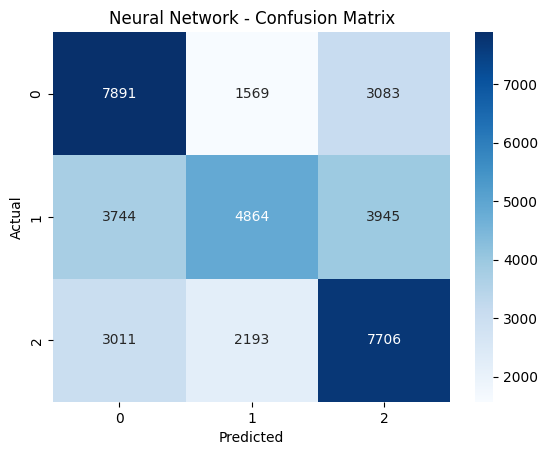

In [33]:
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

print("Neural Net Classification Report:")
print(classification_report(y_test, y_pred_nn))
plot_conf_matrix(y_test, y_pred_nn, "Neural Network")


2025-04-15 15:30:16.120520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744731016.391681     225 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744731016.472430     225 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-15 15:30:32.768915: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Epoch 1/20
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4337 - loss: 1.0656 - val_accuracy: 0.4903 - val_loss: 1.0106
Epoch 2/20
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4778 - loss: 1.0229 - val_accuracy: 0.4944 - val_loss: 0.9998
Epoch 3/20
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4807 - loss: 1.0143 - val_accuracy: 0.5015 - val_loss: 0.9903
Epoch 4/20
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4915 - loss: 1.0033 - val_accuracy: 0.5049 - val_loss: 0.9870
Epoch 5/20
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4952 - loss: 1.0019 - val_accuracy: 0.5074 - val_loss: 0.9854
Epoch 6/20
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4972 - loss: 0.9974 - val_accuracy: 0.5091 - val_loss: 0.9838
Epoch 7/20
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4971 - loss: 0.9953 - val_accuracy: 0.5128 - val_loss: 0.9799
Epoch 8/20
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5008 - loss: 0.9941 - 

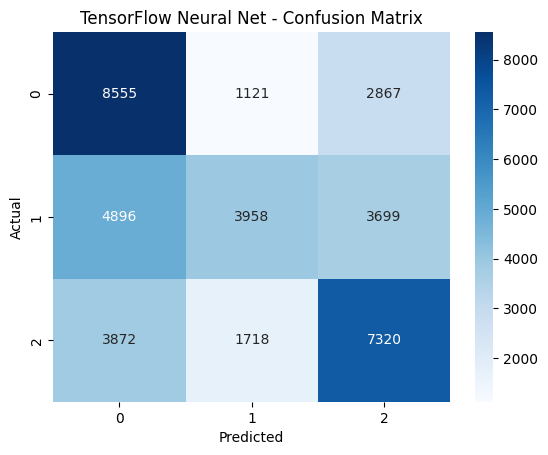

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
"""
    Task:
    Build, train, and evaluate a TensorFlow neural network for classification, with confusion matrix and classification report.

    Approach:
    1. Convert labels to categorical format.
    2. Build a neural network with dense layers and dropout.
    3. Compile with Adam optimizer and categorical crossentropy.
    4. Train with validation split.
    5. Predict test classes.
    6. Evaluate with classification report and confusion matrix.
    """
num_classes = len(set(y_train))  # e.g., 3 classes: 0, 1, 2
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, epochs=20, batch_size=64,
                    validation_split=0.2, verbose=1)

y_pred_probs = model.predict(X_test)
y_pred_tf = y_pred_probs.argmax(axis=1)

print("TensorFlow Neural Network Classification Report:")
print(classification_report(y_test, y_pred_tf))

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, y_pred_tf, "TensorFlow Neural Net")
